In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy

In [31]:
# read in data
traffic_data = pd.read_csv("data/master.csv")
overflow_rates = pd.read_csv("data/overflow_rates.csv")
lane_data = pd.read_csv("data/lane_data.csv")

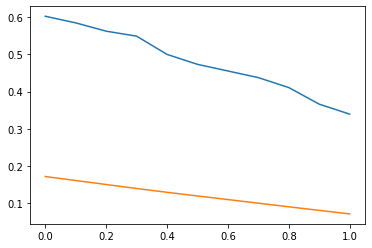

In [32]:
plt.plot(overflow_rates['av_penetration'], overflow_rates['overflow_perc_decr'])
plt.plot(overflow_rates['av_penetration'], overflow_rates['overflow_sum_perc_decr'])

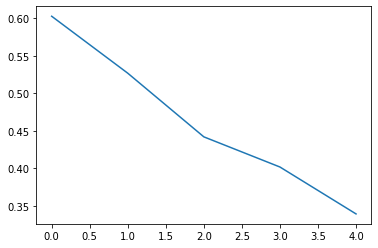

In [33]:
plt.plot(lane_data['lanes'], lane_data['overflow_perc_decr'])

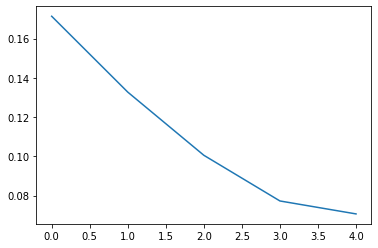

In [34]:
plt.plot(lane_data['lanes'], lane_data['overflow_sum_decr'])

In [35]:
def map_estimate_poly(Phi, y, sigma, alpha):
    # Phi: training inputs, Size of N x D
    # y: training targets, Size of D x 1
    # sigma: standard deviation of the noise 
    # alpha: standard deviation of the prior on the parameters
    # returns: MAP estimate theta_map, Size of D x 1
    
    D = Phi.shape[1] 
    
    
    
    Phi_transpose = np.matrix.transpose(Phi)
    phiT_phi = Phi_transpose.dot(Phi)
    oaI = np.identity(D) * (sigma ** 2 / alpha ** 2)
    inverse = np.linalg.inv(phiT_phi + oaI)
    theta_map = (inverse.dot(Phi_transpose)).dot(y)
    
    return theta_map

In [36]:
def nonlinear_features_maximum_likelihood(Phi, y):
    # Phi: features matrix for training inputs. Size of N x D
    # y: training targets. Size of N by 1
    # returns: maximum likelihood estimator theta_ml. Size of D x 1
    
    kappa = 1e-08 # 'jitter' term; good for numerical stability    
    D = Phi.shape[1]  
    
    # maximum likelihood estimate
    Phi_transpose = np.matrix.transpose(Phi)
    phiT_phi = Phi_transpose.dot(Phi)
    kI = np.identity(D) * kappa
    inverse = np.linalg.inv(phiT_phi + kI)
    theta_ml = (inverse.dot(Phi_transpose)).dot(y)
    return theta_ml

In [37]:
def poly_features(X, K):
    
    # X: inputs of size N x 1
    # K: degree of the polynomial
    # computes the feature matrix Phi (N x (K+1))
    
    X = X.flatten()
    N = X.shape[0]
    
    #initialize Phi
    Phi = np.zeros((N, K+1))
    
    # Compute the feature matrix in stages
    
    
    for i in range(N):
        for k in range(K+1):
            Phi[i,k] = X[i]**k
            
    return Phi

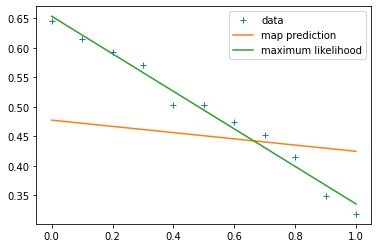

In [44]:
sigma = 1.0 # noise standard deviation
alpha = 1.0 # standard deviation of the parameter prior


# get the MAP estimate
K = 1 # polynomial degree   

X = overflow_rates['av_penetration'].to_numpy()
y = overflow_rates['overflow_5_decr'].to_numpy()


# feature matrix
Phi = poly_features(X, K)

theta_map = map_estimate_poly(Phi, y, sigma, alpha)
theta_ml = nonlinear_features_maximum_likelihood(Phi, y)


Xtest = np.linspace(0,1,100).reshape(-1,1)

Phi_test = poly_features(Xtest, K)
y_pred_map = Phi_test @ theta_map
y_pred_mle = Phi_test @ theta_ml

plt.figure()
plt.plot(X, y, '+')
plt.plot(Xtest, y_pred_map)
plt.plot(Xtest, y_pred_mle)

plt.legend(["data", "map prediction", "maximum likelihood"]);

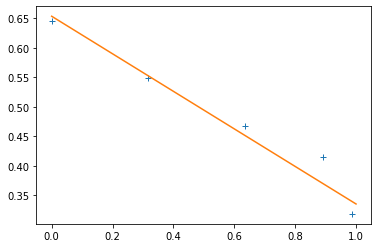

In [45]:
plt.figure()
plt.plot(lane_data['lane_perc_decr_5'], lane_data['overflow_perc_decr_5'], '+')
plt.plot(Xtest, y_pred_mle)

In [40]:
lane_data

,Unnamed: 0,lanes,lane_perc_incr,lane_perc_decr,overflow_perc_decr,overflow_perc_incr,overflow_sum_decr,overflow_sum_incr,overflow_perc_decr_5,overflow_perc_incr_5,...,overflow_sum_decr_520,overflow_sum_incr_520,lane_perc_decr_5,lane_perc_incr_5,lane_perc_decr_405,lane_perc_incr_405,lane_perc_decr_90,lane_perc_incr_90,lane_perc_decr_520,lane_perc_incr_520
0,0,0,0.000000,0.000000,0.602679,0.602679,0.171353,0.172864,0.644444,0.644444,...,0.052083,0.052083,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,1,0.317557,0.317557,0.526786,0.526786,0.132713,0.134008,0.548148,0.548148,...,0.025032,0.025032,0.317557,0.317557,0.317557,0.317557,0.317557,0.317557,0.317557,0.317557
2,2,2,0.635114,0.635115,0.441964,0.437500,0.100530,0.101705,0.466667,0.459259,...,0.009428,0.009428,0.635115,0.635114,0.635115,0.635114,0.635115,0.635114,0.635115,0.635114
3,3,3,0.996080,0.892740,0.401786,0.397321,0.077264,0.077939,0.414815,0.407407,...,0.009428,0.009428,0.892740,0.996080,0.892740,0.996080,0.892740,0.996080,0.892740,0.996080
4,4,4,0.996080,0.986690,0.339286,0.339286,0.070667,0.072717,0.318519,0.318519,...,0.009428,0.009428,0.986690,0.996080,0.986690,0.996080,0.986690,0.996080,0.986690,0.996080


In [43]:
overflow_rates

,Unnamed: 0,Unnamed: 0.1,av_penetration,overflow_perc_decr,overflow_perc_incr,overflow_5_decr,overflow_5_incr,overflow_405_decr,overflow_405_incr,overflow_90_decr,...,overflow_sum_5_incr,overflow_sum_405_decr,overflow_sum_405_incr,overflow_sum_90_decr,overflow_sum_90_incr,overflow_sum_520_decr,overflow_sum_520_incr,overflow_sum_perc_decr,overflow_sum_perc_incr,flow_increase_ratio
0,0,0,0.0,0.602679,0.602679,0.644444,0.644444,0.765957,0.765957,0.333333,...,0.159661,0.275094,0.275630,0.062490,0.062360,0.052083,0.052083,0.171353,0.172864,1.000000
1,1,1,0.1,0.584821,0.584821,0.614815,0.614815,0.765957,0.765957,0.333333,...,0.148444,0.263673,0.264267,0.053900,0.053788,0.047571,0.047571,0.160534,0.162054,1.019856
2,2,2,0.2,0.562500,0.562500,0.592593,0.592593,0.744681,0.744681,0.296296,...,0.137545,0.252076,0.252731,0.045417,0.045322,0.042940,0.042940,0.149858,0.151426,1.040231
3,3,3,0.3,0.549107,0.549107,0.570370,0.570370,0.744681,0.744681,0.296296,...,0.126611,0.240348,0.241070,0.037325,0.037247,0.038158,0.038158,0.139140,0.140774,1.061273
4,4,4,0.4,0.500000,0.500000,0.503704,0.503704,0.723404,0.723404,0.259259,...,0.116284,0.228578,0.229374,0.029786,0.029724,0.033241,0.033241,0.128859,0.130563,1.082907
5,5,5,0.5,0.473214,0.473214,0.503704,0.503704,0.680851,0.680851,0.111111,...,0.106361,0.216951,0.217833,0.024464,0.024413,0.028139,0.028139,0.119048,0.120829,1.105357
6,6,6,0.6,0.455357,0.455357,0.474074,0.474074,0.680851,0.680851,0.111111,...,0.096395,0.205188,0.206164,0.021098,0.021054,0.022834,0.022834,0.109325,0.111187,1.128695
7,7,7,0.7,0.437500,0.437500,0.451852,0.451852,0.680851,0.680851,0.111111,...,0.086609,0.192902,0.193977,0.017583,0.017547,0.018474,0.018474,0.099628,0.101576,1.153071
8,8,8,0.8,0.410714,0.410714,0.414815,0.414815,0.659574,0.659574,0.111111,...,0.076847,0.180011,0.181191,0.013876,0.013847,0.014579,0.014579,0.089851,0.091855,1.178780
9,9,9,0.9,0.366071,0.366071,0.348148,0.348148,0.659574,0.659574,0.111111,...,0.067509,0.166573,0.167873,0.009890,0.009870,0.011825,0.011825,0.080286,0.082323,1.206416
